<a href="https://colab.research.google.com/github/dona-nice/Data-Analysis_UTU/blob/main/DADK2020_exercises2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Donatus I. Edeh <br>
student number 523299 <br>
diedeh@utu.fi  <br>
MonthNovember, 14, 2020  <br>

# Data Analysis and Knowledge Discovery: Exercise 2, Data Understanding and Visualization

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Show the plots inline in the notebook
%matplotlib inline

## 1. Know your data, a quick dive into domain knowledge

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/


Exercise data columns/attributes:
- MMSI
    * ?
- Speed
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- COG
    * Course Over Ground<br> COG=3600 means “not available”
- Destination
    * The Destination of the subject vessel according to the AIS transmissions
- Ship_type
    * The Shiptype of the subject vessel according to AIS transmissions -
- Gross_tonnage
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- Length
    * The overall Length (in metres) of the subject vessel
- Breadth
    * The Breadth (in metres) of the subject vessel

### Questions (add your answer below each question):

#### a) What does the column/feature MMSI represent, how unique is it and when is it updated?
- MMSI means Maritime Mobile Service Identity, It identifies the owner of a ship, and is updated when ever there is a change of ownership.

#### b) Out of the exercise data attributes, mention two examples of dynamic (updated more frequently, automatically or manually) and static (set on installation and updated only when ship ownership changes) data collected.<br>
Dynamic:
1. Course over ground (COG)
2. Speed over ground (SOG)

Static:
1. MMSI (Maritime Mobile Service Identity)
2. Ship type

#### c) Which information is/has been manually updated?<br>
1. Navigational status
2. Ship’s draught
3. Hazardous cargo (type)
4. Destination and ETA
5. oute plan (waypoints)

#### d) For the vessel with the MMSI of 538002778, search for gross tonnage, length and breadth.<br>
Her gross tonnage is 30641, Carrying capacity is 52620 t DWT and her current draught is reported to be 11.5 meters. Her length overall (LOA) is 195 meters and her width is 32.24 meters.

## 2. Data import

#### a) First upload datafiles shipdata1.csv and shipdata2.csv using pandas.
Note! Files were prepared by two different persons, so there are differences in the file formatting, starting from columns separator.<br>

Read data from the open data source directly using the link. Use the url to obtain the data, not a local copy of the file.<br>

- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv
- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv

#### b) Print/show in notebook first 5 rows of both dataframes. 

In [ ]:
# Load shipdata1.csv from the url1 ...
url = 'https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv'
#column_names = ['MMSI','Speed','COG','Destination','Ship_type','Gross_tonnage','Length','Breadth']
pd.read_csv(url, delimiter=',')
#names = column_names)


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.30
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.00
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.90
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.2,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.00
...,...,...,...,...,...,...,...,...
64,259768000,11.8492,80.3430,Porvoo,Tanker,11935,144.1,23.20
65,538002774,11.5935,67.3823,Porvoo,Tanker,30641,195.0,32.20
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24
67,636016683,10.9000,75.4000,Porvoo,Tanker,5440,108.0,16.80


In [ ]:
#Put into Pandas dataframe

shipdata1 = pd.read_csv('https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv', delimiter=',')
#column_names = ['MMSI','Speed','COG','Destination','Ship_type','Gross_tonnage','Length','Breadth']

shipdata1.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.2,21.6
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0


In [ ]:
# Load shipdata2.csv from the url2...
url = 'https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv'
#column_names = ['MMSI','Speed','COG','Destination','Ship_type','Gross_tonnage','Length','Breadth']
pd.read_csv(url, delimiter=';')
#names = column_names

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,"11,3631","74,6552",Porvoo,NaN,30641,195,"32,24"
1,636016752,"11,7","74,6",Porvoo,Tanker,3853,"92,9","15,3"
2,244870429,"11,7126","69,5662",Porvoo,Tanker,7251,115,"18,6"
3,305653000,"10,8253","56,4266",Porvoo,Cargo,6668,"107,03","18,42"
4,235060255,"11,7311","80,9",Primorsk,Tanker,23353,"184,0","27,7"
...,...,...,...,...,...,...,...,...
62,273374820,"10,0","74,6",Vysotsk,Tanker,4979,1399,"16,7"
63,273385070,"9,4","74,5",Vysotsk,Tanker,4979,"139,9","16,9"
64,273388150,"9,7668","68,7159",Vysotsk,Tanker,5075,"140,9","16,9"
65,636092755,"11,2","73,7",Vysotsk,Tanker,23240,"183,0","27,4"


In [ ]:
#Put into Pandas dataframe
shipdata2 = pd.read_csv('https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv', delimiter=';')

#column_names = ['MMSI','Speed','COG','Destination','Ship_type','Gross_tonnage','Length','Breadth']

shipdata2.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,"11,3631","74,6552",Porvoo,NaN,30641,195,"32,24"
1,636016752,"11,7","74,6",Porvoo,Tanker,3853,"92,9","15,3"
2,244870429,"11,7126","69,5662",Porvoo,Tanker,7251,115,"18,6"
3,305653000,"10,8253","56,4266",Porvoo,Cargo,6668,"107,03","18,42"
4,235060255,"11,7311","80,9",Primorsk,Tanker,23353,"184,0","27,7"


## 3. Fix numeric data

#### a) The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

The difference is in the float data type. the decimal point used is different

#### b) Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [ ]:
# Fix issue so that shipdata2 dataframe have similar formatting as in shipdata1.
shipdata2 = shipdata2.replace(regex=[','], value='.')



#### c) Print first 5 rows of updated shipdata2 dataframe. 

In [ ]:
# first 5 rows of updated shipdata2 dataframe

shipdata2.head()


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,NaN,30641,195,32.24
1,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115,18.6
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9,Primorsk,Tanker,23353,184.0,27.7


## 4. Combine dataframes together

Tip for this section: Each subtask can be easily applied with one (or two) line(s) of code when using Pandas.

#### a) Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [ ]:
# Added additional column called origin which indicates the origin of the data according to shipdata name (shipdata1)

shipdata1.insert(loc=0,column='Origin', value='1', allow_duplicates=False)


In [ ]:
print(shipdata1)

   Origin       MMSI    Speed  ...  Gross_tonnage Length Breadth
0       1  212209000  10.1000  ...           3416   94.9   15.30
1       1  212436000  13.5256  ...           6280  116.9   18.00
2       1  219082000   9.9000  ...           9980  141.2   21.90
3       1  219083000  11.6038  ...           9980  141.2   21.60
4       1  219426000  11.9203  ...           3219   99.9   15.00
..    ...        ...      ...  ...            ...    ...     ...
64      1  259768000  11.8492  ...          11935  144.1   23.20
65      1  538002774  11.5935  ...          30641  195.0   32.20
66      1  538002778  11.3631  ...          30641  195.0   32.24
67      1  636016683  10.9000  ...           5440  108.0   16.80
68      1  636016752  11.7000  ...           3853   92.9   15.30

[69 rows x 9 columns]


In [ ]:
# Added additional column called origin which indicates the origin of the data according to shipdata name (shipdata2)

shipdata2.insert(loc=0,column='Origin', value='2', allow_duplicates=False)


In [ ]:
print(shipdata2)

   Origin       MMSI    Speed      COG  ... Ship_type Gross_tonnage  Length Breadth
0       2  538002778  11.3631  74.6552  ...       NaN         30641     195   32.24
1       2  636016752     11.7     74.6  ...    Tanker          3853    92.9    15.3
2       2  244870429  11.7126  69.5662  ...    Tanker          7251     115    18.6
3       2  305653000  10.8253  56.4266  ...     Cargo          6668  107.03   18.42
4       2  235060255  11.7311     80.9  ...    Tanker         23353   184.0    27.7
..    ...        ...      ...      ...  ...       ...           ...     ...     ...
62      2  273374820     10.0     74.6  ...    Tanker          4979    1399    16.7
63      2  273385070      9.4     74.5  ...    Tanker          4979   139.9    16.9
64      2  273388150   9.7668  68.7159  ...    Tanker          5075   140.9    16.9
65      2  636092755     11.2     73.7  ...    Tanker         23240   183.0    27.4
66      2  357100000  11.2703  59.3888  ...     Cargo         43717  229.04 

#### b) Combine the two separate dataframes as one new dataframe.

In [ ]:
# Combine the two separate dataframes as one new dataframe
frames = [shipdata1, shipdata2]

#concatenate dataframes
new_dataframe = pd.concat(frames, sort=False)

new_dataframe

,Origin,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,1,212209000,10.1,64.3,Hamina,Cargo,3416,94.9,15.3
1,1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18
2,1,219082000,9.9,74.7,Hamina,Tanker,9980,141.2,21.9
3,1,219083000,11.6038,74.8,Hamina,Tanker,9980,141.2,21.6
4,1,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15
...,...,...,...,...,...,...,...,...,...
62,2,273374820,10.0,74.6,Vysotsk,Tanker,4979,1399,16.7
63,2,273385070,9.4,74.5,Vysotsk,Tanker,4979,139.9,16.9
64,2,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.9,16.9
65,2,636092755,11.2,73.7,Vysotsk,Tanker,23240,183.0,27.4


#### c) Check a sample of the new dataframe by random sample of six rows.


In [ ]:
# Check a sample of the new dataframe by random sample of six rows
new_dataframerad = new_dataframe.sample(n=6)

new_dataframerad

,Origin,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
4,1,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15
54,1,219178000,11.7699,73.3348,Porvoo,Tanker,7636,129.8,19.9
42,1,477043500,11.9996,77.4823,Muuga,Tanker,61990,247,44
18,2,230941170,9.1,109.9,Tallinn,Tug,139,26.8,7.5
47,2,209185000,12.3292,73.0241,Valko-Loviisa,Cargo,6872,109.83,18.6
23,1,245241000,11.2,74.5,Kotka,Cargo,2862,94.7,13.4


#### d) Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [ ]:
# Check the shape of the new dataframe
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 66
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Origin         136 non-null    object
 1   MMSI           136 non-null    int64 
 2   Speed          136 non-null    object
 3   COG            136 non-null    object
 4   Destination    136 non-null    object
 5   Ship_type      135 non-null    object
 6   Gross_tonnage  136 non-null    int64 
 7   Length         136 non-null    object
 8   Breadth        136 non-null    object
dtypes: int64(2), object(7)
memory usage: 10.6+ KB


I can find the datatype object and int, object and memory usage

## 5. Data cleaning

### Check if there is any missing data or duplicates.
#### a) Are there missing values?

In [ ]:
# Script for missing data
new_dataframe.isnull()

#new_dataframe.isnull().sum().sum()   #count of missing values of the entire dataframe



,Origin,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False


Yes, we have one missing value

#### b) Any duplilcate data; any vessel in the dataframe several times?

In [ ]:
# Check which rows are duplicate and assigne it to column 'Is_duplicate' using boolean

#new_dataframe.duplicated()

new_dataframe["Is_duplicate"]= new_dataframe.duplicated()

new_dataframe

,Origin,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Is_duplicate
0,1,212209000,10.1,64.3,Hamina,Cargo,3416,94.9,15.3,False
1,1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18,False
2,1,219082000,9.9,74.7,Hamina,Tanker,9980,141.2,21.9,False
3,1,219083000,11.6038,74.8,Hamina,Tanker,9980,141.2,21.6,False
4,1,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15,False
...,...,...,...,...,...,...,...,...,...,...
62,2,273374820,10.0,74.6,Vysotsk,Tanker,4979,1399,16.7,False
63,2,273385070,9.4,74.5,Vysotsk,Tanker,4979,139.9,16.9,False
64,2,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.9,16.9,False
65,2,636092755,11.2,73.7,Vysotsk,Tanker,23240,183.0,27.4,False


In [ ]:
new_dataframe.duplicated(subset='Ship_type')

0     False
1     False
2      True
3      True
4      True
      ...  
62     True
63     True
64     True
65     True
66     True
Length: 136, dtype: bool

Answer here...

#### c) Resolve missing data and remove duplicate data.
Tip! Two rows should be removed, but which ones?

In [ ]:
# Script here
new_dataframe.drop_duplicates()


## 6. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [ ]:
# Checking the data types for all attributes

print(new_dataframe.dtypes)

In [ ]:
#convert MMSI to object or string

new_dataframe['MMSI'] = new_dataframe['MMSI'].apply(str)

#convert object or string typed numeric attributes to float

new_dataframe['Speed'] = new_dataframe['Speed'].apply(pd.to_numeric)
new_dataframe['COG'] = new_dataframe['COG'].apply(pd.to_numeric)
new_dataframe['Length'] = new_dataframe['Length'].apply(pd.to_numeric)
new_dataframe['Breadth'] = new_dataframe['Breadth'].apply(pd.to_numeric)

#astype(float)

In [ ]:
new_dataframe.dtypes  #data type conversion result

#### b) Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 

Questions: Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [ ]:
#Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes

include =['float', 'int'] 

data_stat = new_dataframe.describe(percentiles = None, include = include)


data_stat



It makes meaning since one code function (describe) was applied to obtain the descriptive statistics of all attributes at the same, which is better than doing it one  by one.

#### c) Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these.

In [ ]:
# Descriptive statistics for Breadth, Length and Speed

new_dataframe['Breadth'].describe().astype (int)


In [ ]:
# Descriptive statistics for Length 


new_dataframe['Length'].describe().astype (int)

In [ ]:
# Descriptive statistics for Speed


new_dataframe['Speed'].describe().astype (int)

#### d) Descriptive statistics by Ship_type
Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br>
Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.<br>

Questions: How many ship types there are? Which Ship type has the largest breadth?

In [ ]:
# Descriptive statistics by each ship type for the three attributes Breadth, Length and Speed

#new_dataframe.groupby(by=['Ship_type'])

new_dataframe.groupby('Ship_type')['Breadth','Length','Speed'].describe().transpose().astype (int)

There are three ship types, The ship with the largest breadth is Tanker with maximum breadth of 48

## 7. Attribute value distributions
#### a) Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Is this a feasible attribute for classification?

In [ ]:
#To calculate the Histogram bin in four different methods

np.histogram_bin_edges(new_dataframe['Breadth'],bins='sturges')
np.histogram_bin_edges(new_dataframe['Breadth'],bins='scott')
np.histogram_bin_edges(new_dataframe['Breadth'],bins='sqrt')
np.histogram_bin_edges(new_dataframe['Breadth'],bins='fd')

In [ ]:

#Breadth histogram using Sturges method
hist_plot=new_dataframe['Breadth'].hist(bins='sturges')
hist_plot.set_title('Breadth histogram using Sturges method')
hist_plot.set_xlabel('value')
hist_plot.set_ylabel('Frequency')

fig = plt.figure(figsize = (10,15))


In [ ]:
#Breadth histogram using Scott's method
hist_plot=new_dataframe['Breadth'].hist(bins='scott')
hist_plot.set_title('Breadth histogram using Scott method')
hist_plot.set_xlabel('value')
hist_plot.set_ylabel('Frequency')

fig = plt.figure(figsize = (10,15))

In [ ]:
#Breadth histogram using square root method
hist_plot=new_dataframe['Breadth'].hist(bins='sqrt')
hist_plot.set_title('Breadth histogram using square root method')
hist_plot.set_xlabel('value')
hist_plot.set_ylabel('Frequency')

fig = plt.figure(figsize = (10,15))

In [ ]:
#Breadth histogram using Freedman method
hist_plot=new_dataframe['Breadth'].hist(bins='fd')
hist_plot.set_title('Breadth histogram using Freedman-Diaconis method')
hist_plot.set_xlabel('value')
hist_plot.set_ylabel('Frequency')

fig = plt.figure(figsize = (10,15))

- Sturges only accounts for data size and Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.

- Scott is Less robust estimator that takes into account data variability and data size.

- Square root estimator, prefered in Excel and other programs for its speed and simplicity.

- Freedman-Diaconis is a robust estimator that takes into account data 
variability and data size.It is also resilient to outliers.




#### b)	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Any outliers that require some action with the data?

A box plot is a chart often used in explainatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quantiles (or percentiles) and averages.

It shows the five-number summary of a set of data consisting of the minimum score, first(lower) quartile, median, third(upper) quartile, and maximum score. It can also tell about outliers and what their values are

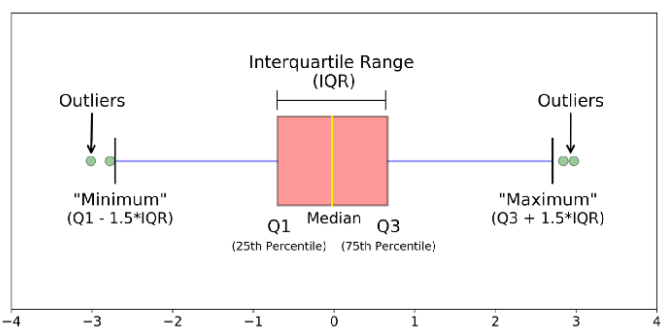

Source:https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [ ]:

new_dataframe.boxplot(['Speed'], by='Ship_type', figsize=(5,5))  #Boxplot for attibute Speed for the 3 categories of ship
                       


In [ ]:
new_dataframe.boxplot(['COG'], by='Ship_type', figsize=(5,5))  #Boxplot for attibute COG for the 3 categories of ship

In [ ]:
new_dataframe.boxplot(['Breadth'], by='Ship_type', figsize=(5,5))  #Boxplot for attibute Breadth for the 3 categories of ship

In [ ]:
new_dataframe.boxplot(['Length'], by='Ship_type', figsize=(7,7))   #Boxplot for attibute Length for the 3 categories of ship

In [ ]:
new_dataframe.boxplot(['Gross_tonnage'], by='Ship_type', figsize=(5,5))  #Boxplot for attibute Gross tonnage for the 3 categories of ship

There are outliers that require actions. Looking at the boxplots COG and gross tonnage seems to have the most outliers compare to others.

##  8. Relationships between attributes

### Pairplots

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 

In [ ]:
# Pairwise scatter plots of the numerical attributes

attributes = ['Breadth','Length','Speed','COG','Gross_tonnage']
 
sns.pairplot(new_dataframe[attributes])

#scatter_matrix(data['Breadth','Length','Speed','COG','Gross_tonnage'])

The pairwise plot for all the numeric attributes is made up of histogram and scatter diagram. we have few cases where data points are concentrated togther and few cases where they are dsiparsed, and a similar case for the hsitograms. There are outliers.

#### b) Make a new clean dataframe without outlier(s) (and include the most relevant attributes only, or limit to those in next tasks) 

In [ ]:
# Script here


### Correlation and heatmap

#### c) What are Pearson's correlation, Spearman's rho and Kendall's tau? Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? Does the detected outlier affect the correlation? You can use heatmap to visualize the matrices and more easily see the strength of the relationship.

**Spearman's** r is a non-parametric version of the pearson correlation coefficient, where data must be ordinal, interval or ration. It returns a value from -1 to +1, where:

+1 is a perfect positive correlation between ranks
-1 is a perfect negative correlation bvetween ranks
0 is no correlation between ranks

Spearman's correlation coefficient

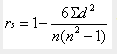

Source: http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1441

where d2 is the squared differences between the pairs of ranks, and n is the number of pairs.





**Pearson correlation** also known as pearson product moment correlation (PPMC) shows the linear relationship between two sets of data. It measures the strength of the association between two varaibles.

Pearson correlation coefficient
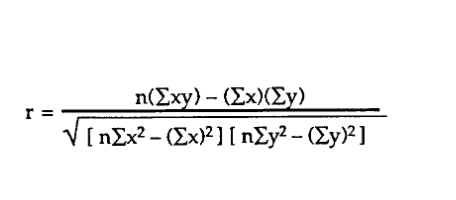
Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/




**Kendall's Tau** is a non-parametric measure of relationships between columns of ranked data. The Tau correlation coefficient returns a value of 0 to 1, where:

0 is no relationship
1 is a perfect relationship

Kendall's tau = (C - D / C + D), where C is the number of concordant pairs and D is the number of discordant pairs       

Explain your fidings here...

In [ ]:
# Pearson's correlation coefficient for the numeric attributes

corrrelation_pearson  = new_dataframe.corr(method="pearson");

print("Pearson correlation coefficient:");

print(corrrelation_pearson);

sns.heatmap(corrrelation_pearson) # create heatmap


In [ ]:
# Spearman's correlation coefficient for the numeric attributes

corrrelation_spearman  = new_dataframe.corr(method="spearman");

print("Spearman rank correlation:");

print(corrrelation_spearman);

sns.heatmap(corrrelation_spearman) # create heatmap


In [ ]:
# Kendall's correlation coefficient for the numeric attributes

corrrelation_kendall  = new_dataframe.corr(method="kendall");

print("Kendall Tau correlation coefficient:");

print(corrrelation_kendall);

sns.heatmap(corrrelation_kendall) # create heatmap

## BONUS: Dimensionality reduction

#### Explain what principal component analysis is. Do that with and without z-score standardization. Visualize the results with a scatter plot by projecting the data to the first two principal components. How much of the variation is explained with the two principal components?

**Principal Component Analysis(PCA)** is an algorithm for linear dimensionality reduction. It is used to compress and visualize data, It can also be used for identification of simple patterns, latent factors and structures of high-dimensional data. Considering a data point, the aim of PCA is to find a projection that is similar to the original datapoint as possible, but have a significantly lower true dimensionality. 

In [ ]:
# Script here


Findings here...

**References**
1. https://simplypsychology.org/boxplots.html

2. https://datatofish.com/python-tutorials/

3. https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

4. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

5. https://www.statisticshowto.com/kendalls-tau/

6. https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

7. https://pythontic.com/pandas/dataframe-computations/correlation

8. https://www.datasciencemadesimple.com/python-pandas-tutorial/

9. https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/

10. https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
11. https://www.marinetraffic.com/en/data/



In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DADK2020_exercises2.ipynb')